# Data Set
The dataset is obtained from [Kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe/data). This dataset contains 515,000 rows and scoring of 1493 luxury hotels across Europe. Following are the features included in data set: 
- Hotel Name
- Hotel Address
- Hotel Score
- Review Date
- Reviewer Nationality
- Positive Review
- Negative Review
- Reviewer Score

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

plt.style.use("seaborn-darkgrid")
warnings.filterwarnings('ignore')

In [2]:
hotel_df = pd.read_csv('data/Hotel_Reviews.csv')
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

# Data Cleansing

In [4]:
hotel_df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

## Top Leisure Hotel

<AxesSubplot:title={'center':'Top 10 Popular Hotels'}, xlabel='Hotel_Name', ylabel='Leisure'>

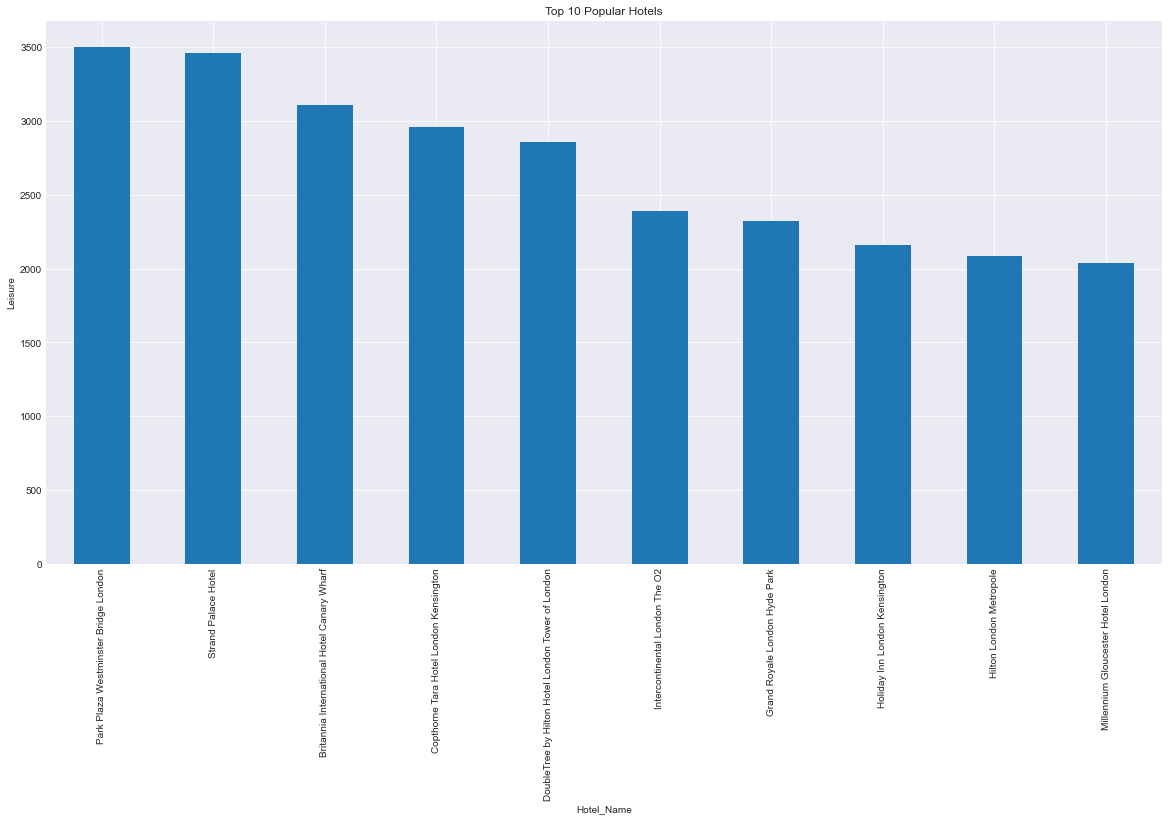

In [5]:
top_leisure_hotels = hotel_df[hotel_df['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)

s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Leisure')
plt.title('Top 10 Popular Hotels')
top_leisure_hotels.plot(kind = 'bar')

## Top Business Hotel

<AxesSubplot:title={'center':'Top 10 Popular Hotels'}, xlabel='Hotel_Name', ylabel='Business'>

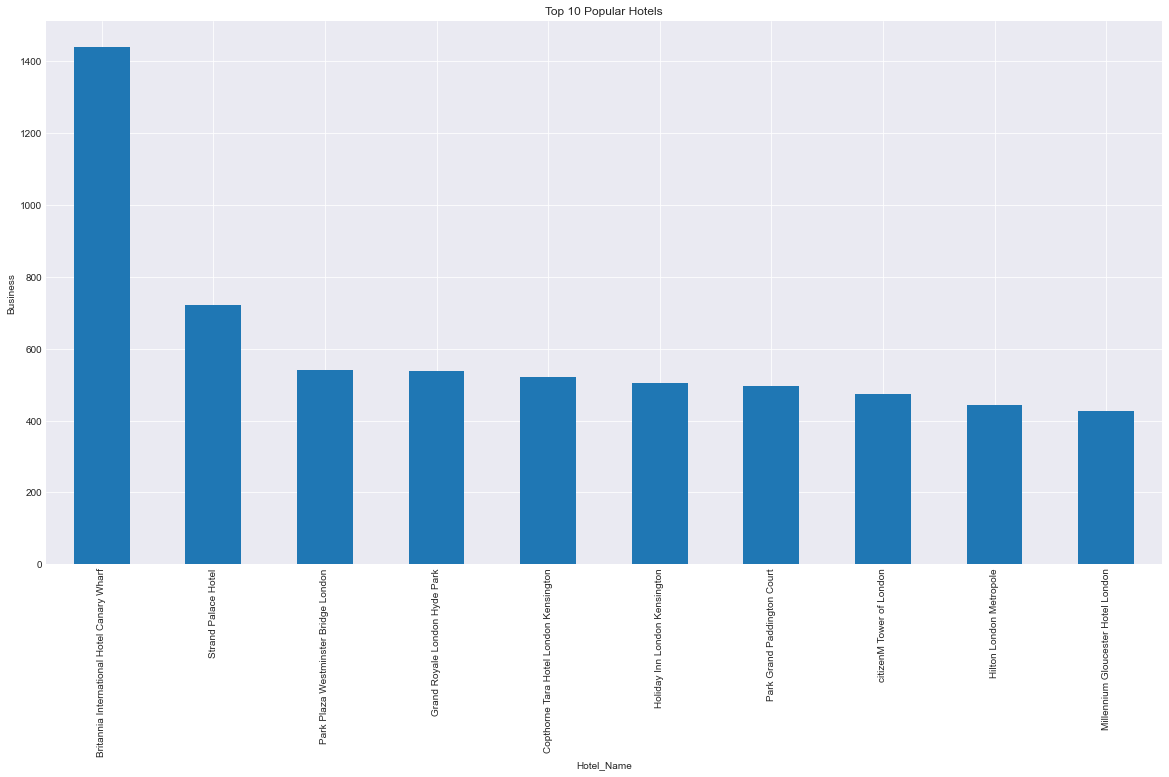

In [6]:
top_business_hotels = hotel_df[hotel_df['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)

s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Business')
plt.title('Top 10 Popular Hotels')
top_business_hotels.plot(kind = 'bar')

<AxesSubplot:title={'center':'Top 10 Popular Hotels'}, xlabel='Hotel_Name', ylabel='Group Destination'>

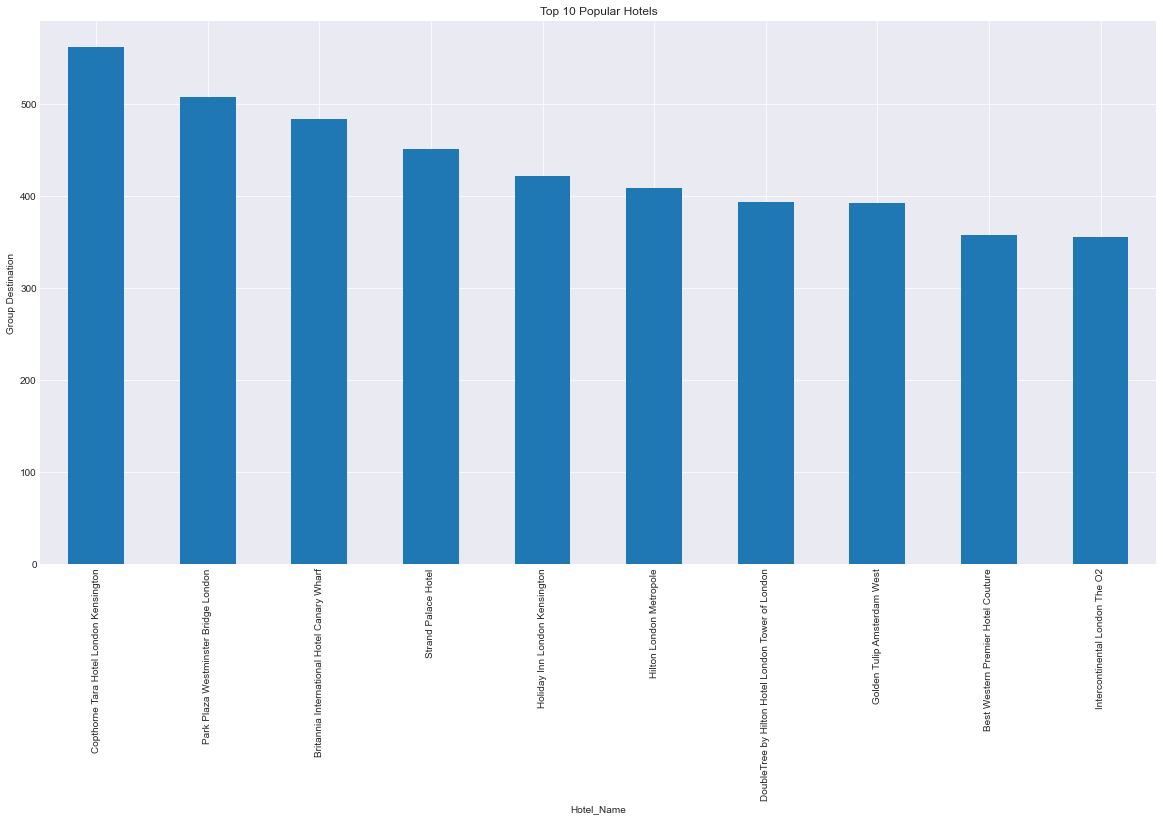

In [7]:
group_destination = hotel_df[hotel_df['Tags'].str.contains('Group')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)

s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Group Destination')
plt.title('Top 10 Popular Hotels')
group_destination.plot(kind = 'bar')

# Top 10 Hotels Based on Reviewer Score

In [8]:
top_hotel_rs = (hotel_df.groupby('Hotel_Name')['Reviewer_Score'].sum() /
               hotel_df.groupby('Hotel_Name')['Reviewer_Score'].count()).sort_values(ascending=False).head(10)

top_hotel_rs

Hotel_Name
Ritz Paris                             9.725000
Hotel Casa Camper                      9.718937
41                                     9.711650
H tel de La Tamise Esprit de France    9.688525
Le Narcisse Blanc Spa                  9.671930
H10 Casa Mimosa 4 Sup                  9.660345
Hotel Eiffel Blomet                    9.646667
Hotel The Serras                       9.623474
45 Park Lane Dorchester Collection     9.603571
The Soho Hotel                         9.597452
Name: Reviewer_Score, dtype: float64

In [9]:
top_hotels_reviews = ['Ritz Paris', 'Hotel Casa Camper', '41', 'H tel de La Tamise Esprit de France', 'Le Narcisse Blanc Spa',
                      'H10 Casa Mimosa 4 Sup',
                      'Hotel Eiffel Blomet',
                      'Hotel The Serras' ,
                      '45 Park Lane Dorchester Collection',
                      'The Soho Hotel']

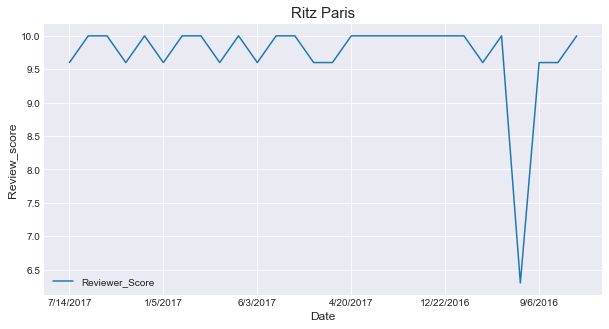

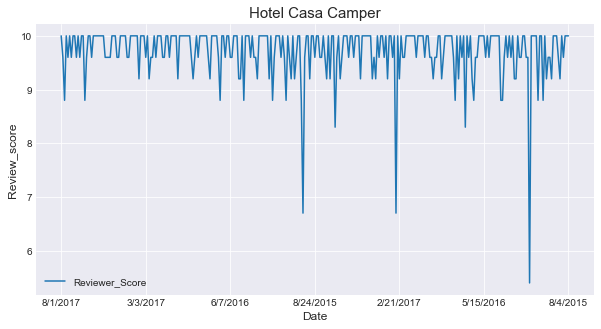

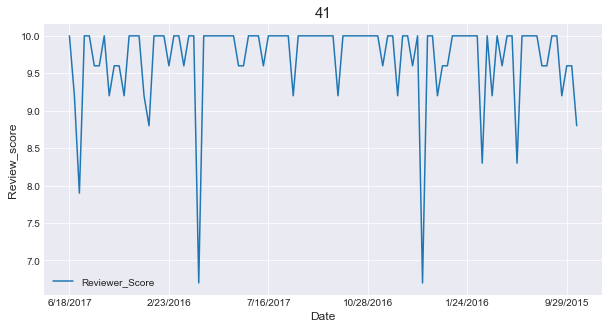

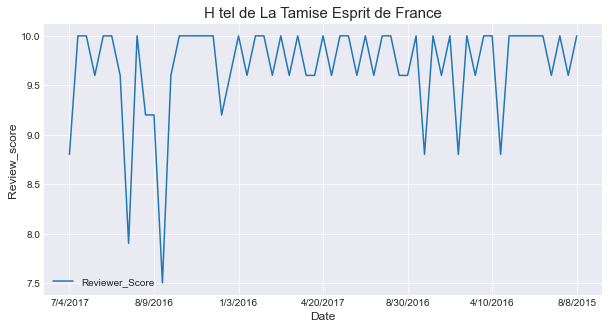

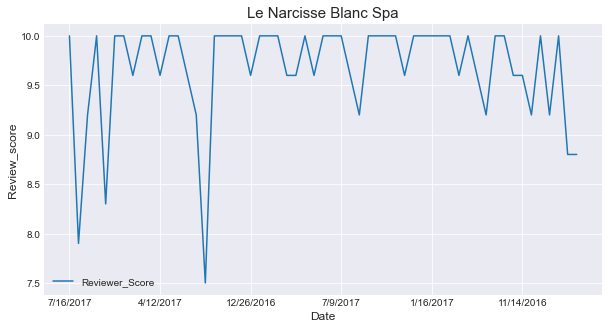

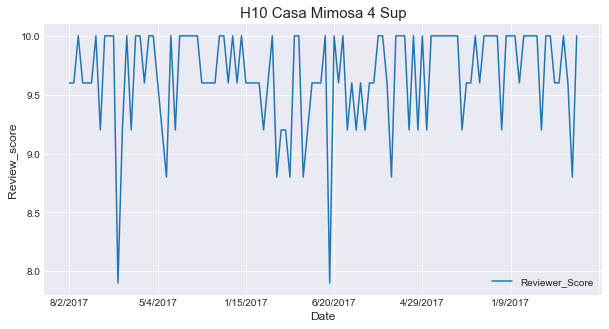

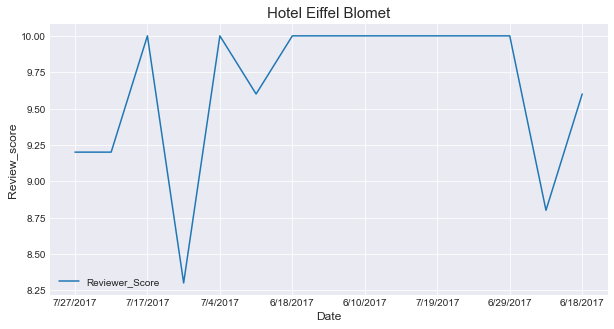

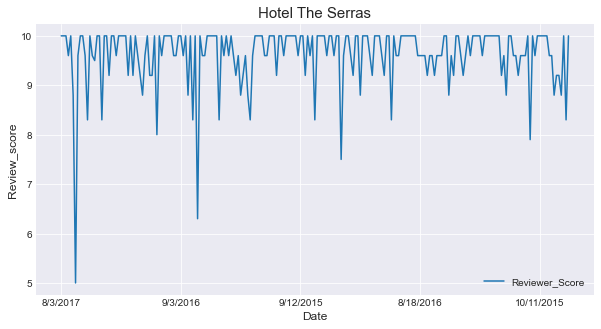

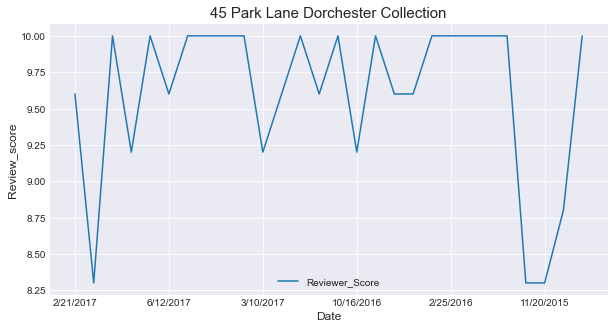

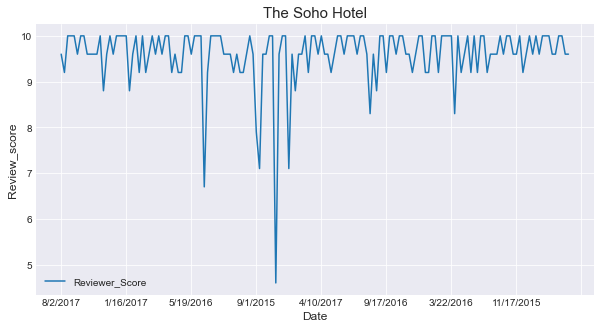

In [10]:
for h in top_hotels_reviews:
    Hotel1 = hotel_df[hotel_df.Hotel_Name == h]
    Hotel1.plot('Review_Date', 'Reviewer_Score',figsize=(10,5))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Review_score', fontsize=12)
    title_str = h
    plt.title(title_str, fontsize=15)
    plt.show()

# Hotel Recommendation based on Reviews

In [11]:
hotel_reviews = hotel_df.groupby('Hotel_Name').agg({'Negative_Review': ', '.join,'Positive_Review': ', '.join}).reset_index()
hotel_reviews.head()

,Hotel_Name,Negative_Review,Positive_Review
0,11 Cadogan Gardens,Thought the prise of drinks at the bar a litt...,We were particularly impressed by the very wa...
1,1K Hotel,Air conditioning in room didn t work and desp...,Location good close to le Marais and 3e arron...
2,25hours Hotel beim MuseumsQuartier,Breakfast not included and buffet really expe...,Cool vintage style in the middle of the museu...
3,41,"There wasn t a thing that we didn t like , No...",Its central proximity close to all services a...
4,45 Park Lane Dorchester Collection,More kinds of fruit juice will make the mini ...,Everything here are almost perfect the staffs...


In [12]:
# Merging postitive and negative into Review column
hotel_reviews['review_text'] = hotel_reviews['Positive_Review'].astype(str) + hotel_reviews['Negative_Review'].astype(str)
hotel_reviews.head()

,Hotel_Name,Negative_Review,Positive_Review,review_text
0,11 Cadogan Gardens,Thought the prise of drinks at the bar a litt...,We were particularly impressed by the very wa...,We were particularly impressed by the very wa...
1,1K Hotel,Air conditioning in room didn t work and desp...,Location good close to le Marais and 3e arron...,Location good close to le Marais and 3e arron...
2,25hours Hotel beim MuseumsQuartier,Breakfast not included and buffet really expe...,Cool vintage style in the middle of the museu...,Cool vintage style in the middle of the museu...
3,41,"There wasn t a thing that we didn t like , No...",Its central proximity close to all services a...,Its central proximity close to all services a...
4,45 Park Lane Dorchester Collection,More kinds of fruit juice will make the mini ...,Everything here are almost perfect the staffs...,Everything here are almost perfect the staffs...


Findout similarity between the reviews of hotel using TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
hotel_reviews['review_text'] = hotel_reviews['review_text'].fillna('')

# Fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(hotel_reviews['review_text'])

tfidf_matrix.shape

(1492, 81002)

Use `linear_kernal` method for calculating similarity between the hotels.

In [14]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [15]:
# Construct a reverse map of indices and hotel names

indices = pd.Series(hotel_reviews.index, index=hotel_reviews['Hotel_Name']).drop_duplicates()

In [16]:
# Function that takes in hotel name as input and outputs most similar hotels
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the hotel that matches the hotel_name
    idx = indices[title]

    # Get the pairwsie similarity scores of all hotels with that hotel
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the hotels based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar hotels
    sim_scores = sim_scores[1:11]

    # Get the hotel indices
    hotel_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar hotel
    return hotel_reviews['Hotel_Name'].iloc[hotel_indices]

In [17]:
# User input hotel name Ritz Paris and get top 10 similar hotel based on user review

get_recommendations('Ritz Paris')

1390                      The Ritz London
1389              The Ritz Carlton Vienna
723                       Hotel Palace GL
334     Four Seasons Hotel George V Paris
1120       Palais Hansen Kempinski Vienna
1270                    South Place Hotel
1396                       The Soho Hotel
1323             The Chesterfield Mayfair
361           Grand H tel Du Palais Royal
1213                      Rosewood London
Name: Hotel_Name, dtype: object

In [18]:
get_recommendations('The Soho Hotel')

510                 Hilton London Bankside
1323              The Chesterfield Mayfair
1278    St Martins Lane A Morgans Original
1368           The Montague On The Gardens
1393                 The Royal Horseguards
1316                  The Bloomsbury Hotel
61                 Apex Temple Court Hotel
1380        The Piccadilly London West End
1485                    art otel Amsterdam
1230             Sanderson A Morgans Hotel
Name: Hotel_Name, dtype: object

# Reference
- Susan Li. (2019) [Building a Content Based Recommender System for Hotels in Seattle](https://towardsdatascience.com/building-a-content-based-recommender-system-for-hotels-in-seattle-d724f0a32070)